# Aula 11 - Agrupamento
Para utilizar os algoritmos de agrupamento usamos o módulo de clustering do pacote scikit learn.
(https://scikit-learn.org/stable/modules/clustering.html). Neste exemplo faremos o agrupamento usando o algoritmo *k-means*.

## 11.1 Gerando dados

Inicialmente vamos trabalhar com dados criados artificialmente, para que possamos enxergar o que está acontecendo. Geramos 3 conjuntos de pontos no plano euclidiano, sendo que cada conjunto possui caracteristicas parecidas. Abaixo os pontos são gerados, e cada conjunto é plotado com um *scatterplot* com cores distintas.

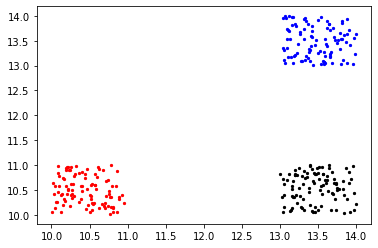

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gerando dados aleatórios para testar o algoritmo
l_x1 = np.random.rand(100) + 10
l_y1 = np.random.rand(100) + 10

l_x2 = np.random.rand(100) + 13
l_y2 = np.random.rand(100) + 13

l_x3 = np.random.rand(100) + 13
l_y3 = np.random.rand(100) + 10

fig, ax = plt.subplots(1,1)
ax.scatter(l_x1, l_y1, 5 ,color  = "red")
ax.scatter(l_x2, l_y2, 5 ,color  = "blue")
ax.scatter(l_x3, l_y3, 5 ,color  = "black")

Vemos que de fato os dados são bem 'separáveis' em 3 conjuntos distintos. Abaixo vamos salvar o conjunto criado em um único array (em um caso real, não saberíamos à qual grupo cada ponto pertence, nem mesmo o número de grupos totais).

In [140]:
# Salvando os dados em uma única lista de np array com duas dimensões, e transformando tudo em um array
X = []
for i in range(0, len(l_x1)):
    X.append( np.array((l_x1[i],l_y1[i]))  )
    X.append( np.array((l_x2[i],l_y2[i]))  )
    X.append( np.array((l_x3[i],l_y3[i]))  )

X = np.array(X)

## 11.2 Calculando os grupos
Usamos o `KMeans` para calcular os aos quais os dados pertencem. Para isso precisamos passar o número de grupos que queremos utilizar (no caso abaixo 3). O retorno é um array com o mesmo tamanho do conjunto de dados de entrada, em que cada elemento contém um número referente ao cluster que o dado pertence.

In [141]:
# Usando o algoritmo para ajustar os dados usando 3 clusters
from sklearn.cluster import KMeans as km
kmeans = km(n_clusters = 3, random_state = 0).fit(X)

# O retorno é um array com o numero do cluster que a amostra foi associada
kmeans.labels_

array([1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2])

Agora podemos separar os dados, cada um em seu cluster. Usando a indexação boolena no vetor X para
coletar todos os valores em que labels == 1, 2, .... Em seguida plotamos os dados em um gráfico (scatterplot) novamente, e conseguimos retornar ao mesmo gráfico que fizemos após a geração dos dados. O que mostra que todos os dados ficaram de fato em seus respectivos grupos.

Ainda, usamos o método `cluster_centers`, que contém um array bidimensional (neste caso) com os centróides dos grupos para plotá-los também.

array([[13.47318416, 13.47692526],
       [10.43945521, 10.49243407],
       [13.46658493, 10.54601324]])

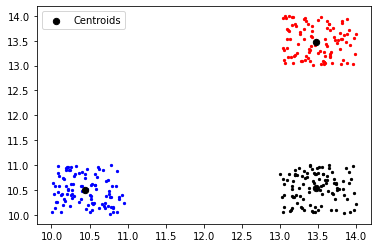

In [145]:

cond = kmeans.labels_ == 0 
C1 = X[cond]

cond2 = kmeans.labels_ == 1 
C2 = X[cond2]

cond3 = kmeans.labels_ == 2 
C3 = X[cond3]

'Plotando os dados no plano, cada um com uma cor'
fig, ax = plt.subplots(1,1)
plt.scatter(C1[:,0], C1[:,1],5, color = "red") # Todas as linhas da coluna 0,  # Todas as linhas da coluna 1
plt.scatter(C2[:,0], C2[:,1],5, color = "blue") # Todas as linhas da coluna 0,  # Todas as linhas da coluna 1
plt.scatter(C3[:,0], C3[:,1],5, color = "black") # Todas as linhas da coluna 0,  # Todas as linhas da coluna 1


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],40, c = 'black', label = 'Centroids')
plt.legend() 
kmeans.cluster_centers_

## 11.3 Definindo o número de grupos (*clusters*)
Mas como determinar o número de clusters? No exemplo acima definimos 3, pois já sabíamos de antemão que esse era um bom número, dado que o conjunto foi gerado com 3 grupos. Em problemas reais, no entanto, não teremos nenhuma informações a respeito desse número.

Podemos usar uma abordagem visual chamada **gráfico de cotovelo (elbow plot)**. Para isso, usamos uma medida de desempenho do agrupamento chamada WCSS(Within-Cluster Sum of Square), ou soma dos quadrados intra-grupos. Esse medida calcula a soma da distancia de todos os pontos ao centróide de seus grupos. A idéia é que a medida que o número de grupos aumenta, essa distância deve ser reduzida. Porém a partir de um determinado número a redução passa a ser insignificante, de forma que esse é o ponto em que aumentar o número de grupos não influencia mais no desempenho do agrupamento. 


O atributo `.inertia_` fornece o WCCS. Com isso podemos calcular os grupos para diversos valores de *k*, salvando os valores de WCCS em uma lista, em seguida plotamos os valores e obtemos o gráfico de cotovelo.

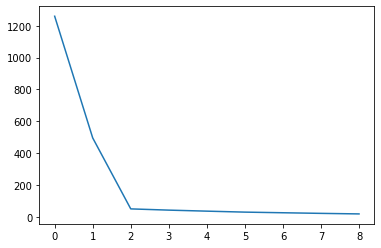

In [133]:

l_inertia = []
for k in range(1,10):
    kmeans = km(n_clusters = k, random_state = 0).fit(X)
    l_inertia.append(kmeans.inertia_)
l_inertia

# Agora plotamos os valores de inertia e vemos como o gráfico de cotovelo fica:
fi, ax = plt.subplots(1,1)
ax.plot(l_inertia)

Pela análise do gráfico percebemos que o cotovelo está localizado no segundo grupo (como começa em zero, no terceiro), o que condiz com o esperado.

## 11.4 Prevendo novos valores
Com o modelo estimado, podemos prever em quais grupos novos conjuntos de dados seriam atribuidos, usando a função `predict`. O exemplo abaixo demonstra:

In [151]:
# Estimando à qual cluster o ponto [10.3, 13.1] seria atribuido
novo_dado = [[10.3, 13.1]]
grupo_novo_dado = kmeans.predict(novo_dado)
print("O grupo do novo dado é : ",grupo_novo_dado[0])

O grupo do novo dado é :  1


<div style="background-color:gray">
    <h1 style = "text-align:center; color:white"> Exercícios</h1>
</div>

1. Considere o conjunto de dados 'clientes_shoppin.csv'. Este conjunto contém os dados de diversos clientes de um Shoppping center, com os dados de renda anual e coeficiente de compra (dentre outros). O coeficiente de compra é um número entre 0 e 100 valorando o quanto o cliente compra no Shopping. O shopping deseja fazer uma segmentação dos clientes para criar uma campanha de marketing mais efetiva. Implemente a segmentação usando o algoritmo k-means, com base nos dois atributos mencionados acima.
    1. Encontre o número ideal de grupos
    2. Plote o gráfico de cotovelo
    3. Plote os dados dos clientes após a segmentação com cores diferentes
2. Considere o conjunto de dados MateriaisConstrucao.xlsx, que mantém um registro da quantidade de itens que foram comprados em uma loja de materiais de construção. Será que existem grupos de *padrões de compra* que podem ser identificados? Aplique o agrupamento para descobrir. Use a ferramenta de PCA (*principal component analysis*) para reduzir a dimensionalidade dos dados e plotar os pontos em um gráfico 2D (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html, um exemplo em https://acervolima.com/implementando-pca-em-python-com-scikit-learn/).
3. (**Se tivermos visto Streamlit**) Crie um aplicativo que leia um banco de dados, e permita que o usuário selecione 2 atributos (numéricos). Com esses atributos, faça o que se pede:
    1. Mantenha um slide para o usuário selecionar o número de grupos.
    2. Quando o slide é alterado, o algoritmo k-means é calculado considerando esse número.
    3. Um gráfico com os elementos de cada grupo é mostrado, sendo que cada grupo deve possuir uma cor diferente.
    
4. **(EXTRA)**. O agrupamento pode ser utilizado para melhorar a acurácia de um classificador/regressor. Imagine que o shopping deseja criar um regressor para estimar o coeficiente de compra de novos clientes com base nos atributos *genero*, *idade* e *renda anual*.
    Podemos primeiro encontrar os grupos com caracteristicas parecidas usando um algoritmo de agrupamento. Em seguida, criamos um classificador diferente para cada um desses grupos, de forma que a chance de se obter uma classificação correta aumenta.